In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names=['Pregnancies','Glucose','BP','SkinThickness','Insulin','BMI','DiabetesPedigree ','Age','Outcome']
data = pd.read_csv(url,names=names)

In [3]:
data.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
#Checking for null values, none found
data.isnull().sum()

Pregnancies          0
Glucose              0
BP                   0
SkinThickness        0
Insulin              0
BMI                  0
DiabetesPedigree     0
Age                  0
Outcome              0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    int64  
 1   Glucose            768 non-null    int64  
 2   BP                 768 non-null    int64  
 3   SkinThickness      768 non-null    int64  
 4   Insulin            768 non-null    int64  
 5   BMI                768 non-null    float64
 6   DiabetesPedigree   768 non-null    float64
 7   Age                768 non-null    int64  
 8   Outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

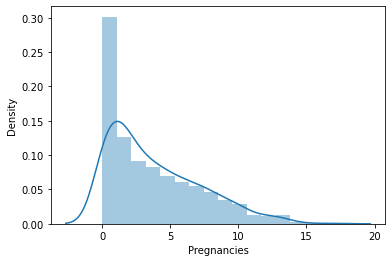

In [7]:
sns.distplot(data['Pregnancies'])

<AxesSubplot:xlabel='Pregnancies'>

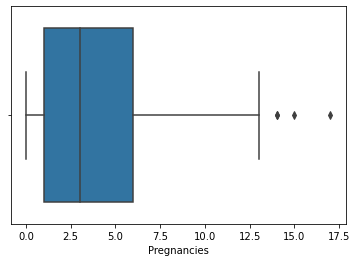

In [8]:
sns.boxplot(data['Pregnancies'])

In [10]:
data.loc[data.Pregnancies>13]

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [12]:
data.drop(data[data['Pregnancies'] > 13].index, inplace = True)
data.shape

(764, 9)

<AxesSubplot:xlabel='Glucose'>

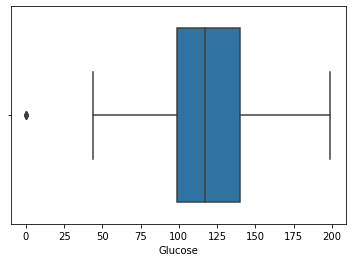

In [14]:
# 
sns.boxplot(data.Glucose)

In [16]:
data.loc[data.Glucose==0]

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [17]:
data.drop(data[data['Glucose']==0].index, inplace = True)
data.shape

(759, 9)

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

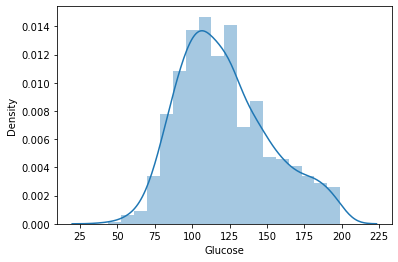

In [18]:
sns.distplot(data.Glucose)

<AxesSubplot:xlabel='BP', ylabel='Density'>

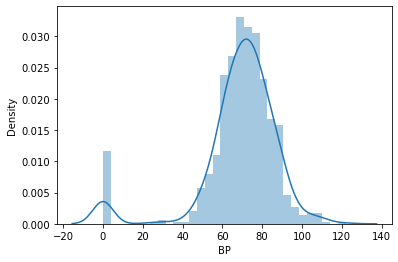

In [21]:
# For many rows BP is 0. But 0 BP does not make any sense so it might be the case that for these people BP value was
# not available.
sns.distplot(data.BP)

In [25]:
data.loc[data.BP==0].shape

(35, 9)

In [28]:
# As this is small dataset replacing 0 BP values with median
data.BP = data.BP.replace(0,data.BP.median())

<AxesSubplot:xlabel='BP'>

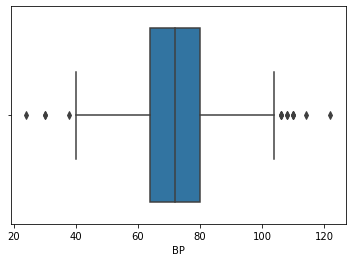

In [31]:
# Outliers are still present for BP
sns.boxplot(data.BP)